In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data = pd.read_csv('/home/filnow//Desktop/data/covtype.csv')

print(data.shape)
data.head()

(581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
#Covert one-hot encoded soil types to categorical
soil_types = data.iloc[:, 14:54]
data = data.loc[:, ~data.columns.isin(soil_types.columns.to_list())]
soil_types = soil_types.idxmax(axis=1)
soil_types = soil_types.str.replace('Soil_Type', '')
soil_types = soil_types.astype('int')
data['Soil_Type'] = soil_types
#Covert one-hot encoded wilderness areas to categorical
wilderness_areas = data.iloc[:, 10:14]
data = data.loc[:, ~data.columns.isin(wilderness_areas.columns.to_list())]
wilderness_areas = wilderness_areas.idxmax(axis=1)
wilderness_areas = wilderness_areas.str.replace('Wilderness_Area', '')
wilderness_areas = wilderness_areas.astype('int')
data['Wilderness_Area'] = wilderness_areas

data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,5,29,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,29,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,12,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,30,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,29,1


In [6]:
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values



print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(464809, 12)
(116203, 12)
(464809,)
(116203,)


In [93]:
#make sklearn logistic multiclass classifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', multi_class='multinomial', solver='lbfgs', max_iter=1000))

pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)
y_pred = pipe.predict(X_test)

print(f'Accuracy of logistic regression classifier on test set: {score:.2f}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy of logistic regression classifier on test set: 0.71
[[29464 12170     4     0     0     0   919]
 [10560 44830   800     1     0   264    45]
 [    0   884  5636    37     0   564     0]
 [    0     0   319   134     0    73     0]
 [    6  1933    56     0     0     0     0]
 [    0  1034  1751    22     0   682     0]
 [ 1822    67     0     0     0     0  2126]]
              precision    recall  f1-score   support

           1       0.70      0.69      0.70     42557
           2       0.74      0.79      0.76     56500
           3       0.66      0.79      0.72      7121
           4       0.69      0.25      0.37       526
           5       1.00      0.00      0.00      1995
           6       0.43      0.20      0.27      3489
           7       0.69      0.53      0.60      4015

    accuracy                           0.71    116203
   macro avg       0.70      0.47      0.49    116203
weighted avg       0.71      0.71      0.70    116203



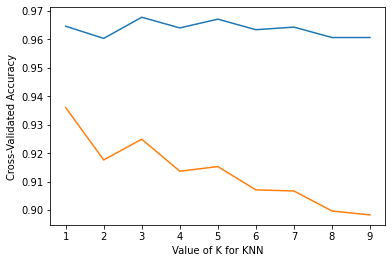

In [8]:
#check how many k we need
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(1, 10)
k_scores_train = []
k_scores_test = []

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    train_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores_train.append(train_scores.mean())
    test_scores = cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
    k_scores_test.append(test_scores.mean())

plt.plot(k_range, k_scores_train, label='Train')
plt.plot(k_range, k_scores_test, label='Test')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [12]:
#make knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
y_pred = knn.predict(X_test)

print(f'Accuracy of KNN classifier on test set: {score:.2f}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy of KNN classifier on test set: 0.97
[[41200  1236     1     0    31     4    85]
 [ 1147 55082    61     0   151    45    14]
 [    4    80  6901    20    13   103     0]
 [    0     1    75   416     0    34     0]
 [   29   146    16     0  1797     7     0]
 [    4    66   112    19     7  3281     0]
 [  100    20     0     0     0     0  3895]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97     42557
           2       0.97      0.97      0.97     56500
           3       0.96      0.97      0.97      7121
           4       0.91      0.79      0.85       526
           5       0.90      0.90      0.90      1995
           6       0.94      0.94      0.94      3489
           7       0.98      0.97      0.97      4015

    accuracy                           0.97    116203
   macro avg       0.95      0.93      0.94    116203
weighted avg       0.97      0.97      0.97    116203



In [38]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train).astype(np.float32)
X_val = scaler.transform(X_val).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(62384, 12)
(15596, 12)
(62384,)
(15596,)


In [88]:
#make pytorch dataset
class ForestDataset(Dataset):
        def __init__(self, X, y):
            self.X = X
            self.y = y
            
        def __len__(self):
            return len(self.X)
        
        def __getitem__(self, idx):
            return self.X[idx], self.y[idx]

train_dataset = ForestDataset(X_train, y_train)
val_dataset = ForestDataset(X_val, y_val)
test_dataset = ForestDataset(X_test, y_test)
#make pytorch dataloader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True)
#make pytorch model
class ForestNet(nn.Module):
    def __init__(self):
        super(ForestNet, self).__init__()

        self.classifier = nn.Sequential(
            nn.Linear(12, 512),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(512),
            nn.Dropout(p=0.2),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(256),
            nn.Dropout(p=0.2),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(128),
            nn.Dropout(p=0.2),
            nn.Linear(128, 8)
        )
    
    def forward(self, x):
        x = self.classifier(x)
        return x

In [80]:
#train net

def train(model, train_loader, val_loader, epochs=10, lr=0.001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    train_losses, val_losses = [], []
    train_acc, val_acc = [], []

    for epoch in range(epochs):
        train_loss, val_loss = 0.0, 0.0
        correct_train, correct_val = 0, 0
        total_train, total_val = 0, 0
        
        model.train()
        
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            
            optimizer.zero_grad()
            output = model(data)
            
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()*data.size(0)
            
            _, predicted = torch.max(output.data, 1)
            total_val += target.size(0)
            correct_val += (predicted == target).sum().item()
            accuracy_train = 100 * correct_val / total_val

        model.eval()

        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                
                output = model(data)
                
                loss = criterion(output, target)
                
                val_loss += loss.item()*data.size(0)

                _, predicted = torch.max(output.data, 1)
                total_val += target.size(0)
                correct_val += (predicted == target).sum().item()
                accuracy_val = 100 * correct_val / total_val
            
            train_loss = train_loss/len(train_loader.dataset)
            val_loss = val_loss/len(val_loader.dataset)
            
            train_acc.append(accuracy_train)
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            val_acc.append(accuracy_val)

            if epoch % 10 == 0:
                print(f'Accuracy train: {accuracy_train:.2f} %, Accuracy val: {accuracy_val:.2f} %')
                print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
                    epoch, 
                    train_loss,
                    val_loss
                    ))
    return model, train_losses, val_losses, train_acc, val_acc

In [81]:
model, train_losses, val_losses, train_acc, val_acc = train(ForestNet(), train_loader, val_loader, epochs=100, lr=0.001)

Accuracy train: 70.13 %, Accuracy val: 71.09 %
Epoch: 0 	Training Loss: 0.754968 	Validation Loss: 0.596323
Accuracy train: 78.96 %, Accuracy val: 79.53 %
Epoch: 10 	Training Loss: 0.498677 	Validation Loss: 0.432379
Accuracy train: 80.81 %, Accuracy val: 81.38 %
Epoch: 20 	Training Loss: 0.454844 	Validation Loss: 0.386415
Accuracy train: 82.30 %, Accuracy val: 82.73 %
Epoch: 30 	Training Loss: 0.429566 	Validation Loss: 0.378046
Accuracy train: 82.87 %, Accuracy val: 83.35 %
Epoch: 40 	Training Loss: 0.411799 	Validation Loss: 0.356494
Accuracy train: 83.38 %, Accuracy val: 83.87 %
Epoch: 50 	Training Loss: 0.398872 	Validation Loss: 0.343829
Accuracy train: 83.55 %, Accuracy val: 84.13 %
Epoch: 60 	Training Loss: 0.391894 	Validation Loss: 0.333686
Accuracy train: 84.06 %, Accuracy val: 84.53 %
Epoch: 70 	Training Loss: 0.381516 	Validation Loss: 0.330321
Accuracy train: 84.44 %, Accuracy val: 84.98 %
Epoch: 80 	Training Loss: 0.375168 	Validation Loss: 0.321146
Accuracy train: 84.6

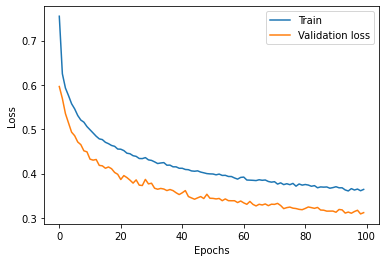

In [82]:
#plot losses
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

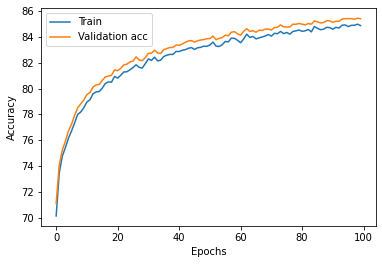

In [83]:
#plot accuracy
plt.plot(train_acc, label='Train')
plt.plot(val_acc, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()